## Startups profit prediction using multiple linear regression 

### Overview

In this Task , we will be predicting the profit from the startups dataset with the features available with us. We're using the 50-startups dataset for this problem statement and we will be using concept of Multiple linear regression to predict the profit of startups companies.

##Data **Understanding**

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

It's a great dataset for evaluating Multiple regression models.

Goal:-
To predict whether a particular startup would be safe to invest in or not.

Dataset contain 5 columns--"R&D Spend","Administration","Marketing Spend","State","Profit".

1.R&D Spend Research and development – R&D – is the process by which a company works to obtain new knowledge that it might use to create new technology, products, services, or systems that it will either use or sell. So,this column tells you how much you spend on R&D.

2.Administration It is the process of arrangements and tasks needed to control the operation of a plan or organization.

3.Marketing Spend refers to activities undertaken by a company to promote the buying or selling of a product or service. Marketing includes advertising, selling, and delivering products to consumers or other businesses.

4.State This column contain three states which is Califonia,Newyork and Floida.

5.Profit
Profit is a financial benefit that is realized when the amount of revenue gained from a business activity exceeds the expenses, costs, and taxes needed to sustain the activity.


The task of the Regression Algorithm is to find the maping function to map the input variable(x) to teh continious output variable(y). Regression analysis estimates the realtionship between a dependent variables and independent variables. In the class we talked about two different approach

Analytical Approach i.e Ordinary Least Square Methods
Machine Learning Approach i.e Using Gradient Descent In this exercise you are expected to implement both the methods from scratch.

### **Importing** libraries
Step 1: Importing the libraries
In this first step, we will be importing the libraries required to build the ML model. The NumPy library, the matplotlib, the sklearn, the seaborn are imported. Additionally, we have imported the Pandas library for data analysis.

In [ ]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

##Importing the **dataset**
In the next step, we shall use pandas to store the data obtained from Kaggle and store it as a Pandas DataFrame named as “50_Startups.dataset” using the function “50_Startups.csv”.

We go through our dataset and assign the independent variable (x) to the first four columns of our dataset, namely R&D Spend (index=0), Administration (index=1), Marketing Spend (index=2) and State (index=3).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')

# **Analyzing the data**

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
43,15505.73,127382.30,35534.17,New York,69758.98
45,1000.23,124153.04,1903.93,New York,64926.08
21,78389.47,153773.43,299737.29,New York,111313.02
22,73994.56,122782.75,303319.26,Florida,110352.25
20,76253.86,113867.30,298664.47,California,118474.03


In [ ]:
dataset.shape

(50, 5)

In [ ]:
len(dataset)

50

In [ ]:
# Numerical/Statistical analysis of the dataset
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# Dimensions of dataset
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.') 

There are  50 rows and  5 columns in the dataset.


In [ ]:
# Here we are trying to check that whether this dataset has any duplicate value or not
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [ ]:
# Check for NULL values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# **Inference :** There are no null values in the dataset  


In [ ]:
# Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# from corr function we can find the correlation between the columns.
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# **Inference:**  We can obseve that all three columns have a **direct relationship with the profit**, which is our target variable.

#Here we are able to see distribution of each feature in the farm of histogram

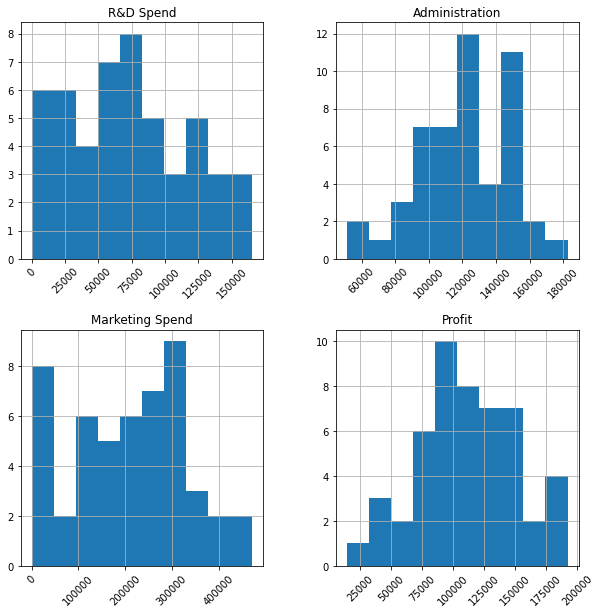

In [ ]:
#Plot histogram grid
dataset.hist(xrot=45, figsize=(10,10))
plt.show()

#Here we are able to see distribution of each feature in the farm of Scatter plot

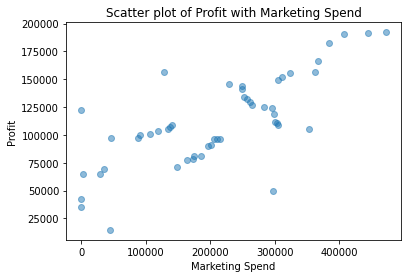

In [ ]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')              
plt.xlabel('Marketing Spend')                          
plt.ylabel('Profit')   
plt.show()

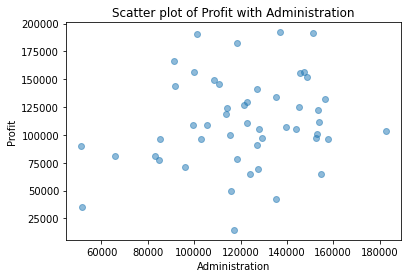

In [ ]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')              
plt.xlabel('Administration')                          
plt.ylabel('Profit')   
plt.show()

Text(0, 0.5, 'Profit')

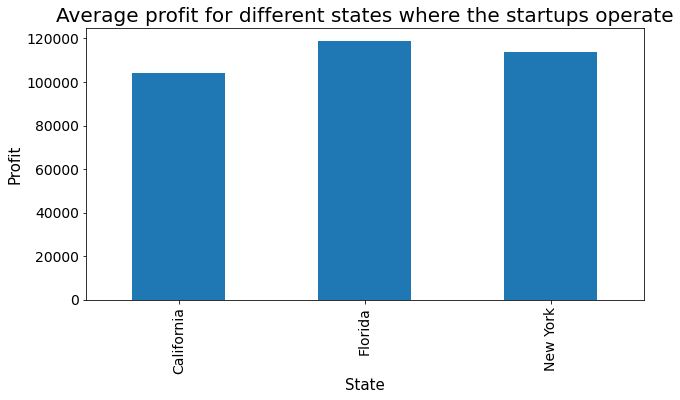

In [ ]:
from IPython.core.pylabtools import figsize
#Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)
#Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# **EDA on Dataset**

Correlation matrix 

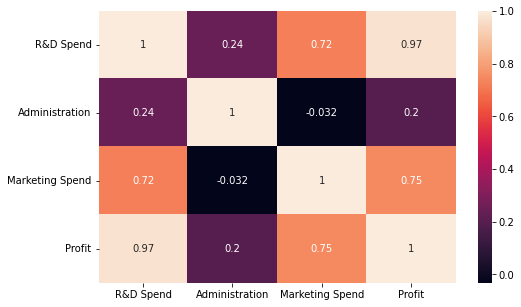

In [ ]:
#Correlation matrix from finding most significant variable
import seaborn as sns
plt.figure(figsize=(8,5))
correlation = dataset.corr().round(4)
sns.heatmap(data=correlation,annot=True)
plt.show()


# **Inference :** The heatmap of correlation also demonstrates similar insights i.e. **direct relationship with profit** 

In [ ]:
# from corr function we can find the correlation between the columns.
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
correlation = dataset.corr(method='pearson')
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


#Here we are able to see distribution of each feature in the farm of Scatter plot

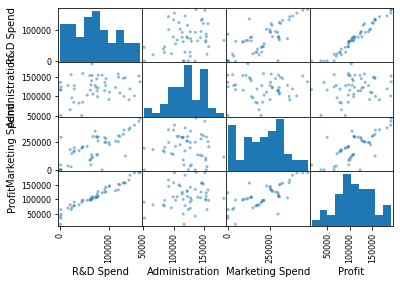

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

**Scatter Plot**

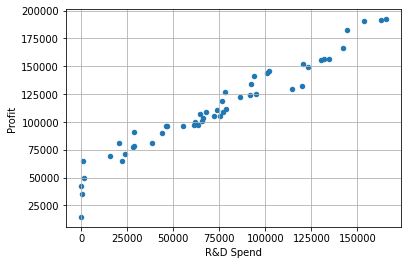

In [ ]:
dataset.plot.scatter(x= 'R&D Spend', y= 'Profit')                         
plt.grid()   
plt.show()


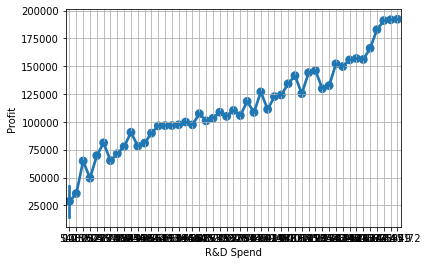

In [ ]:
#The plot between Profit and R&D Spend
sns.pointplot(x = 'R&D Spend', y = 'Profit', data = dataset)
plt.grid()
plt.show()

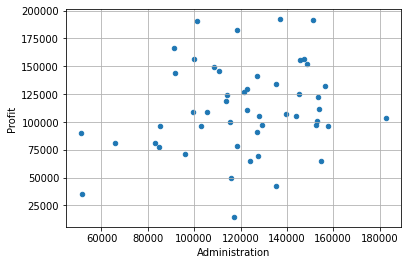

In [ ]:
dataset.plot.scatter(x= 'Administration', y= 'Profit')                         
plt.grid()   
plt.show()

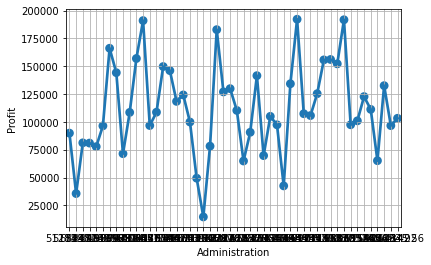

In [ ]:
#The plot between Profit and Adminstration
sns.pointplot(x = 'Administration', y = 'Profit', data = dataset)
plt.grid()
plt.show()

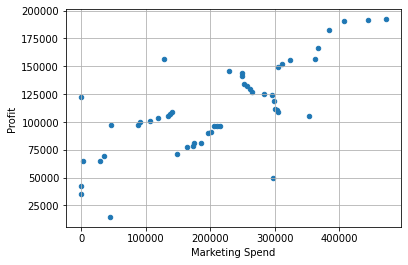

In [ ]:
dataset.plot.scatter(x= 'Marketing Spend', y= 'Profit')                         
plt.grid()   
plt.show()


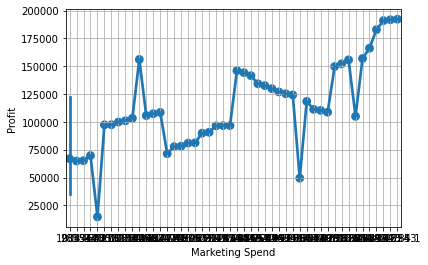

In [ ]:
#Marketing doesn't actually provide more profit, they are varying like shown in the plot
sns.pointplot(x = 'Marketing Spend', y = 'Profit', data = dataset)
plt.grid()
plt.show()

**Outliers detection** in **target variable**

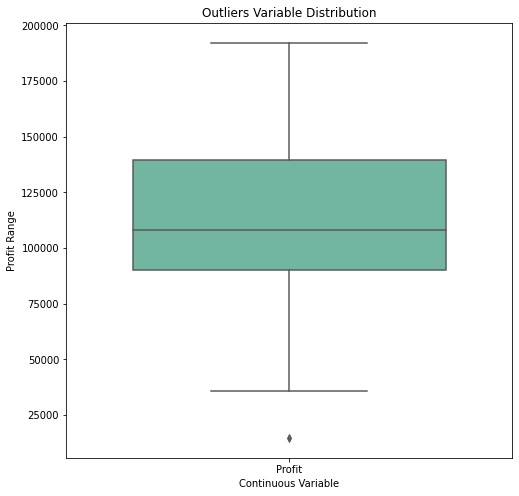

In [ ]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

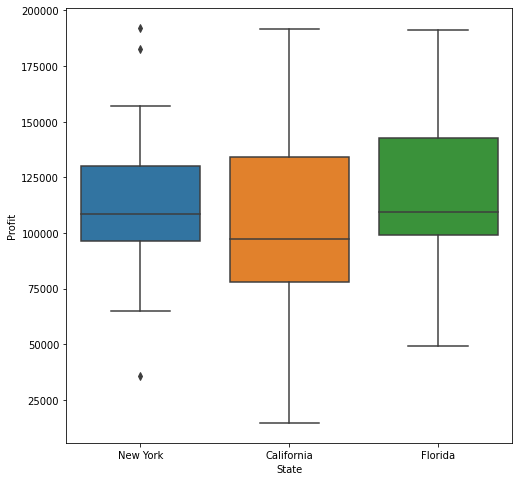

In [ ]:
# Relationship between CATEGORICAL & NUMERICAL FEATURE NAME
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

**Insights:**

- All outliers presented are in the state of New York.
# - The startups located in the state of California have a greater range between the minimum and the maximum profit.

**Histgram** on **Profit**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


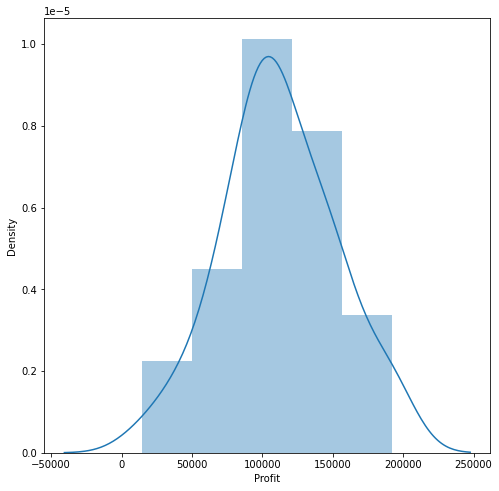

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

**Inference :** **The average profit (which is 100k)** is the most frequent i.e. it's more likely to be in distribution plot

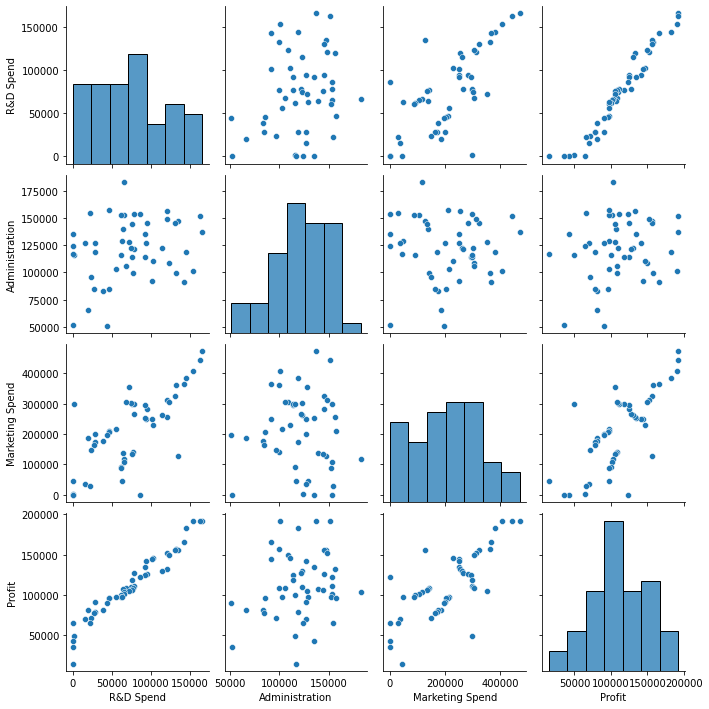

<Figure size 360x360 with 0 Axes>

In [ ]:
sns.pairplot(dataset)
plt.figure(figsize=(5,5))
plt.show()

**Inference:**

- As we can see in the pairpot, the more you invest in Research and Development the greater will be your profit.
- The marketing spend seems to be directly proportional (though little bit outliers are there) with the profit.
- The administration spend seems to have no relation with the profit.

#Data Cleaning
Check the Duplicate, if exists then remove those duplicate from the data frame

In [ ]:
#Check the Number of the Rows before Removing Duplicate
dataset.shape

(50, 5)

In [ ]:
#Call drop duplicate on dataframe to remove Duplicates and Assign it backs to Dataframe
dataset = dataset.drop_duplicates()

In [ ]:
#Check the Number of Rows after Removing Duplicates
dataset.shape

(50, 5)

### Model Development

In [ ]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#### Label **Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
# Now we have to split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [ ]:
# Feature Scaling -- Useful when Features have different units

"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)\ny_test = sc_y.fit_transform(y_test)'

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [ ]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149947
Model Score/Performance on Training data 0.9515496105627431


In [ ]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


# **Model evaluation**

**R2 score: R2 score - R squared score. It is one of those statistical approach by which we can find the variance or the spread of the dependent variables with the help of independent data.**

In [ ]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716635


**MSE: MSE - Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the points.**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse)

Mean Squarred Error is : 62244962.38946446


**RMSE: RMSE - Root Mean Squared Error. This is the similar to Mean squared error(MSE) approach, the only difference is that here we find the root of mean squared error i.e. root of Mean squared error is equals to Root Mean Squared Error. The reason behind finding the root is to find the more close residual error as compared to the values found by mean squared error.**

In [ ]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974607


**MAE:  MAE - Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.**

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae*100)

Mean Absolute Error is : 650357.7323580028


CONCLUSION
So, the mean absolute error is *6503.577323580025*. Therefore our predicted value can be *6503.577323580025 units greater than or less than the actual value*.